<a href="https://colab.research.google.com/github/Dee-6777/data-analysis-of-summer-olympics/blob/main/Analysis_on_Olympics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import re

Dataset

NOC: https://drive.google.com/file/d/1_zGhADzXEA9mFHvuCvpllXMCN2DUE2tH/view?usp=sharing

Athlete: https://drive.google.com/file/d/1y6e0eNKfyo9ILqQHszcrRuv3uQhIMm_z/view?usp=sharing

# Reading the dataset

In [ ]:
athlete = pd.read_csv('/content/drive/MyDrive/ShapeAI DST 11021 Oct-Jan Batch 2021-22/Datasets/athlete_events.csv')
noc = pd.read_csv('/content/drive/MyDrive/ShapeAI DST 11021 Oct-Jan Batch 2021-22/Datasets/noc_regions.csv')

# Creating a copy of the DataFrame

In [ ]:
ath = athlete.copy()
cou = countries.copy()

# Data Exploration

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
ath.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
ath.shape

(271116, 15)

In [ ]:
countries.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
countries.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [ ]:
countries.shape

(230, 3)

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
# Find out the ratio of null and not null value in the Medal column
# ath.Medal.isnull().sum()/ath.Medal.notnull().sum()
print(f'{ath.Medal.isnull().sum()}:{ath.Medal.notnull().sum()}')
print(ath.Medal.isnull().sum(),":",ath.Medal.notnull().sum())

231333:39783
231333 : 39783


In [ ]:
name = input()
print(f'Hello, my name is {name}')

In [ ]:
countries.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

# Data Cleaning & Data Manipulation

1. Find all the rows (Datpoints) in the countries DataFrame where region is NaN

In [ ]:
countries[countries['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [ ]:
# Show all the rows from the athlete DataFrame where region is "ROT", "TUV" or "UNK"

# ?

Q. Add a column "Region" to the "ath" Dataframe. And the region column should have the region according to the elements in the "NOC" column of the "countries" DataFrame.

In [ ]:
ath.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
countries.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [ ]:
region = ath['NOC'].map(countries.set_index('NOC')['region'])

In [ ]:
region

0               China
1               China
2             Denmark
3             Denmark
4         Netherlands
             ...     
271111         Poland
271112         Poland
271113         Poland
271114         Poland
271115         Poland
Name: NOC, Length: 271116, dtype: object

In [ ]:
ath.insert(7,'Region', region)

In [ ]:
ath.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'Region',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,Region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
# Delete the NOC column from "ath" DataFrame

ath.drop('NOC', axis=1, inplace=True)

In [ ]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


Handling the null values in the columns - "Age", "Height", "Weight" (from the ath DataFrame)

In [ ]:
# Find the minimum Age
ath.Age.min()

10.0

In [ ]:
ath.Age.max()

97.0

In [ ]:
ath.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [ ]:
# Fill all the NaN values with the mean value of the Age column
ath['Age'].fillna(ath.Age.mean(), inplace=True)

In [ ]:
ath.Age = ath.Age.astype('int')

In [ ]:
ath.Age

0         24
1         23
2         24
3         34
4         21
          ..
271111    29
271112    27
271113    27
271114    30
271115    34
Name: Age, Length: 271116, dtype: int64

In [ ]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   Region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


In [ ]:
ath.Height.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [ ]:
ath.Weight.describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

In [ ]:
ath.Height = ath.Height.fillna(ath.Height.mean())
ath.Weight = ath.Weight.fillna(ath.Weight.mean())

In [ ]:
ath.Height = ath.Height.astype('int')
ath.Weight = ath.Weight.astype('int')

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  int64 
 1   Name    271116 non-null  object
 2   Gender  271116 non-null  object
 3   Age     271116 non-null  int64 
 4   Height  271116 non-null  int64 
 5   Weight  271116 non-null  int64 
 6   Team    271116 non-null  object
 7   Region  270746 non-null  object
 8   Games   271116 non-null  object
 9   Year    271116 non-null  int64 
 10  Season  271116 non-null  object
 11  City    271116 non-null  object
 12  Sport   271116 non-null  object
 13  Event   271116 non-null  object
 14  Medal   39783 non-null   object
dtypes: int64(5), object(10)
memory usage: 31.0+ MB


List out all the values of the region columns where the values are null

In [ ]:
ath[ath.Region.isnull()]

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21,175,70,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25,175,70,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28,173,68,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24,170,61,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21,180,75,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26,182,95,Singapore,NaN,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN
268753,134454,Zhang Guirong,F,30,182,95,Singapore,NaN,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN
268993,134587,Zhang Xueling,F,21,163,53,Singapore,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
268994,134587,Zhang Xueling,F,21,163,53,Singapore-1,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN


In [ ]:
ath.Region.fillna('Singapore', inplace=True)

In [ ]:
for i in ath[ath.Region.isnull()]['Team']:
  print(i)

Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Refugee Olympic Athletes
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Refugee Olympic Athletes
Singapore
Singapore
Singapore
Singapore
June Climene
Singapore
Singapore
Singapore
Singapore
Singapore
June Climene
Unknown
Tuvalu
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Rika II
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Rika II
Singapore
Rika II
June Climene
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore
Singapore-2
Rika II
Si

Handling the Null Values in the column "Medals"

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,175,70,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
ath.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
ath.Medal.nunique()

3

In [ ]:
ath.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
# Replace
# NaN -> 0
# Gold -> 1
# Silver -> 2
# Bronze -> 3

In [ ]:
ath.Medal = ath.Medal.replace([np.nan, 'Gold', 'Silver', 'Bronze'],[0, 1, 2, 3])

In [ ]:
ath.Medal

0         0
1         0
2         0
3         1
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 271116, dtype: int64

In [ ]:
ath.Medal.value_counts()

0    231333
1     13372
3     13295
2     13116
Name: Medal, dtype: int64

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  int64 
 1   Name    271116 non-null  object
 2   Gender  271116 non-null  object
 3   Age     271116 non-null  int64 
 4   Height  271116 non-null  int64 
 5   Weight  271116 non-null  int64 
 6   Team    271116 non-null  object
 7   Region  271116 non-null  object
 8   Games   271116 non-null  object
 9   Year    271116 non-null  int64 
 10  Season  271116 non-null  object
 11  City    271116 non-null  object
 12  Sport   271116 non-null  object
 13  Event   271116 non-null  object
 14  Medal   271116 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 31.0+ MB


In [ ]:
ath.isnull().sum()

ID        0
Name      0
Gender    0
Age       0
Height    0
Weight    0
Team      0
Region    0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Delete some unwanted/irrelavant columns

In [ ]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23,170,60,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


In [ ]:
# Delete the columns - ID, Region, Games
ath.drop(['ID', 'Region', 'Games'], axis=1, inplace=True)

Remove the unwanted phrases from the "Event' column

In [ ]:
ath.head(2)

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180,80,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23,170,60,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


In [ ]:
for i,j in zip(ath.Sport, range(len(ath.Event))):
  ath.Event[j] = re.sub(f'{i}\s','',ath.Event[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ath.head(3)

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180,80,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170,60,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24,175,70,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0


In [ ]:
ath.shape

(271116, 12)

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    271116 non-null  object
 1   Gender  271116 non-null  object
 2   Age     271116 non-null  int64 
 3   Height  271116 non-null  int64 
 4   Weight  271116 non-null  int64 
 5   Team    271116 non-null  object
 6   Year    271116 non-null  int64 
 7   Season  271116 non-null  object
 8   City    271116 non-null  object
 9   Sport   271116 non-null  object
 10  Event   271116 non-null  object
 11  Medal   271116 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 24.8+ MB


# Exportation of the DataFrame

In [ ]:
# Export to JSON
ath.to_json('olympics_dataset.json')

# Export to Excel
ath.to_excel('olympics_dataset.xlsx')

# Export to CSV
ath.to_csv('olympics_dataset.csv')

# Data Analysis

1. Show the relationship b/w Height and Weight

Text(0.5, 1.0, 'Height Vs Weight')

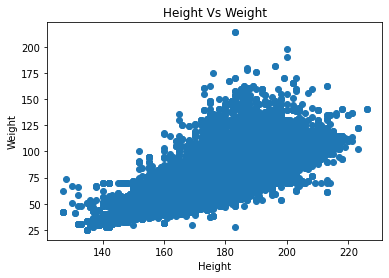

In [ ]:
plt.scatter(ath.Height, ath.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height Vs Weight')

* Conclusion

2. Find out how many Male and Female had participated in the Olympics w.r.t. the given dataset (Data Visualisation)

In [ ]:
ath.Gender.value_counts()

M    196594
F     74522
Name: Gender, dtype: int64

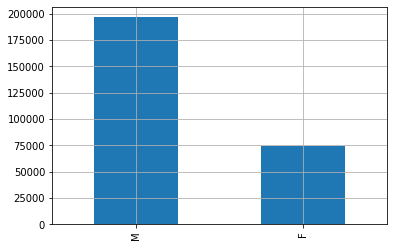

In [ ]:
ath.Gender.value_counts().plot.bar()
plt.grid()

3. How many Male and Female have participated in the Summer and Winter Olympics

4. Name the Top 5 countries who're having the most medals

5. How many medals did the Female have won during the Summer Olympics.

6. Name all the cities where the 2012 Olympics was held.

7. Name all the Players who has participated in the game 'Judo'